# 🎓 Project 2: Student Performance Analytics Dashboard  
**📁 Domain:** Data Science & Analytics  
**📌 Internship:** Tamizhan Skills – RISE Program  

---

## 📍 Problem Statement  
Educational institutions often struggle to identify students who are at risk of failing or dropping out. Without early intervention, these students might fall behind unnoticed. Data-driven dashboards can assist in detecting such patterns proactively.

---

## 🎯 Objective  
To analyze student performance data and develop an interactive dashboard that highlights key performance indicators such as marks, attendance, and login frequency. This dashboard should enable academic institutions to take timely academic interventions.

---

## 🎯 Targets / Deliverables  
- ✅ Load and explore student dataset  
- ✅ Calculate performance indicators (averages, correlations, absentees)  
- ✅ Identify top-performing vs struggling students  
- ✅ Visualize data using bar plots, heatmaps  
- ✅ Prepare dashboard-style visual summaries

---

## 📊 Expected Outcomes  
- Summary dashboards showing student performance trends  
- List of at-risk students based on attendance/marks  
- Visual insights for early intervention planning

---

## 🛠️ Technologies / Tools Used  
- Python  
- Pandas – for data manipulation  
- Seaborn / Matplotlib – for visualizations  
- (Optional: Plotly or Dash – for interactive dashboards)

## 📦 Step 1: Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual settings
sns.set(style="whitegrid")

## 📂 Step 2: Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 📊 Step 3: Add Performance Indicators (Average Score)

In [3]:
# 🎯 Calculate average score across subjects
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# 🟢 Label students based on performance
def label_performance(score):
    if score >= 75:
        return 'High Performer'
    elif score >= 50:
        return 'Average Performer'
    else:
        return 'At-Risk'

df['performance category'] = df['average score'].apply(label_performance)

# Preview
df[['math score', 'reading score', 'writing score', 'average score', 'performance category']].head()

,math score,reading score,writing score,average score,performance category
0,72,72,74,72.666667,Average Performer
1,69,90,88,82.333333,High Performer
2,90,95,93,92.666667,High Performer
3,47,57,44,49.333333,At-Risk
4,76,78,75,76.333333,High Performer


## 📈 Step 4: Visualize Score Distribution by Subject and Category

C:\Users\vnska\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


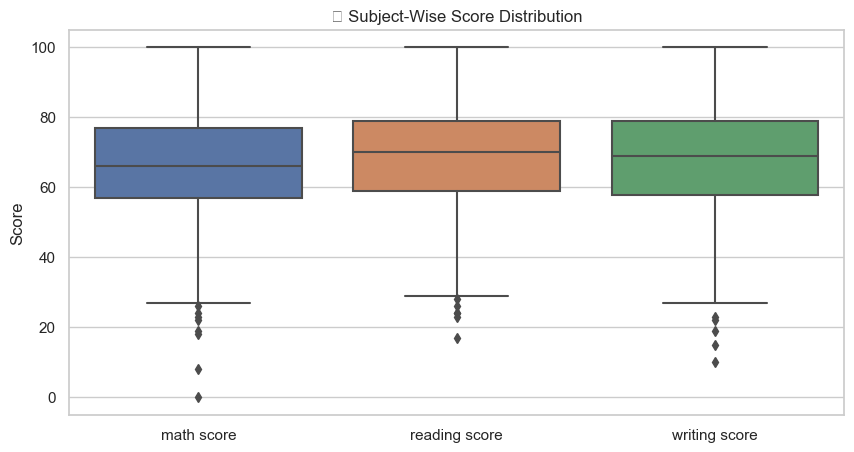

In [4]:
# 📊 Average scores by subject
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title("📚 Subject-Wise Score Distribution")
plt.ylabel("Score")
plt.show()

C:\Users\vnska\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


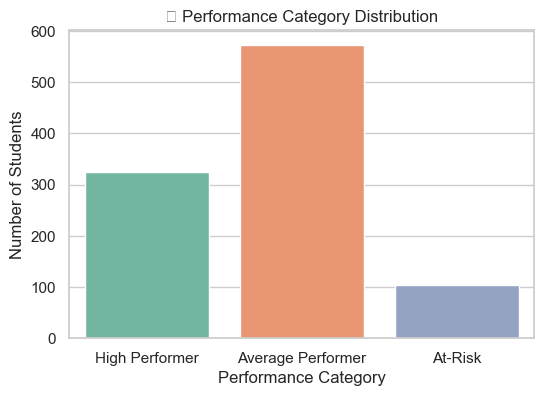

In [5]:
# 🟢 Count of students by performance category
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='performance category', palette='Set2', order=['High Performer', 'Average Performer', 'At-Risk'])
plt.title("🎯 Performance Category Distribution")
plt.xlabel("Performance Category")
plt.ylabel("Number of Students")
plt.show()

## 🔍 Step 5: Correlation & Impact Analysis (Gender, Lunch, Prep Course)

✅ A. Correlation Heatmap Between Scores

C:\Users\vnska\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


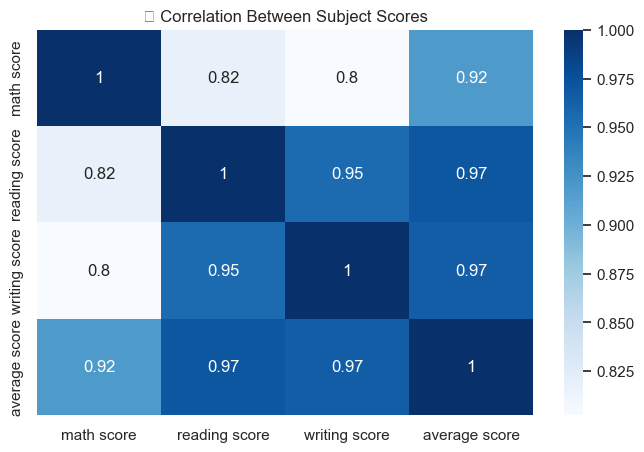

In [6]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['math score', 'reading score', 'writing score', 'average score']].corr(), annot=True, cmap='Blues')
plt.title("📊 Correlation Between Subject Scores")
plt.show()

✅ B. Impact of Test Preparation Course

C:\Users\vnska\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


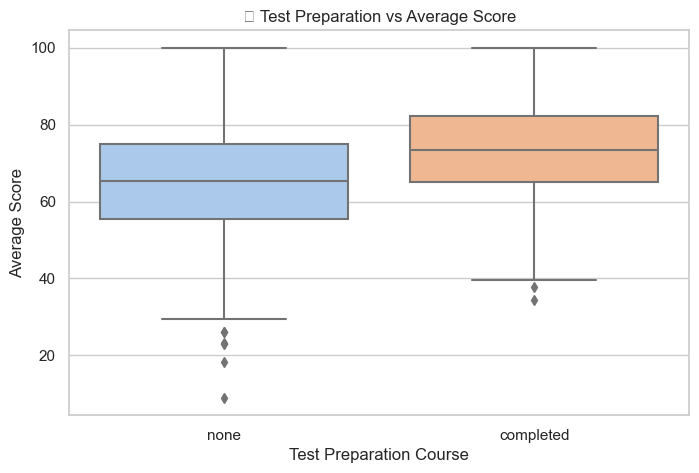

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='test preparation course', y='average score', palette='pastel')
plt.title("📚 Test Preparation vs Average Score")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.show()

✅ C. Impact of Lunch Type

C:\Users\vnska\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\vnska\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


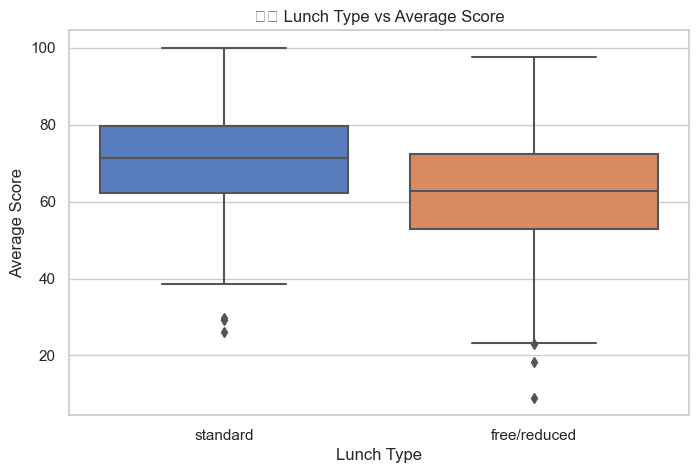

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='lunch', y='average score', palette='muted')
plt.title("🍽️ Lunch Type vs Average Score")
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")
plt.show()

✅ D. Impact of Gender

C:\Users\vnska\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9893 (\N{MALE AND FEMALE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


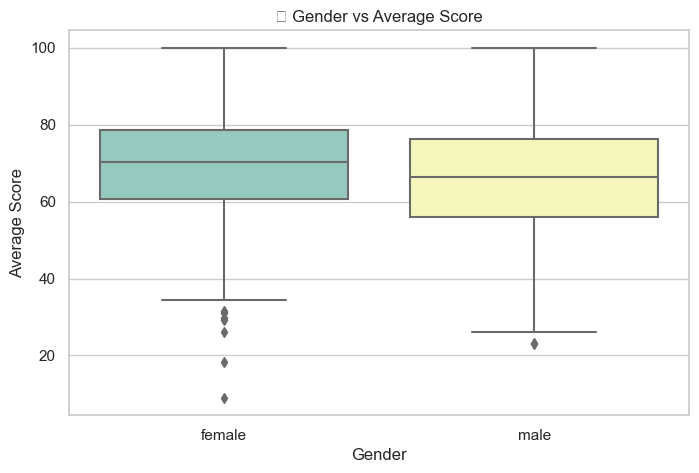

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='gender', y='average score', palette='Set3')
plt.title("⚥ Gender vs Average Score")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()

In [10]:
# Group by prep course and performance category
df.groupby(['test preparation course', 'performance category']).size()

test preparation course  performance category
completed                At-Risk                  18
                         Average Performer       179
                         High Performer          161
none                     At-Risk                  85
                         Average Performer       394
                         High Performer          163
dtype: int64

## 🚨 Step 6: Identify At-Risk Students & Summarize Key Insights

✅ A. Filter Students with Average Score < 50

In [11]:
# Students at risk
at_risk_students = df[df['average score'] < 50]

# Preview
at_risk_students[['gender', 'lunch', 'test preparation course', 'average score']].head()

,gender,lunch,test preparation course,average score
3,male,free/reduced,none,49.333333
7,male,free/reduced,none,40.666667
9,female,free/reduced,none,49.333333
11,male,standard,none,45.000000
17,female,free/reduced,none,26.000000


📊 B. Summary Stats for At-Risk Group

In [12]:
# Count of at-risk students
num_at_risk = at_risk_students.shape[0]
print(f"🚨 Total At-Risk Students: {num_at_risk}")

# Gender distribution
print("\nGender Distribution:")
print(at_risk_students['gender'].value_counts())

# Prep course analysis
print("\nTest Preparation Course (Completed vs Not):")
print(at_risk_students['test preparation course'].value_counts())

# Lunch type impact
print("\nLunch Type Breakdown:")
print(at_risk_students['lunch'].value_counts())

🚨 Total At-Risk Students: 103

Gender Distribution:
male      64
female    39
Name: gender, dtype: int64

Test Preparation Course (Completed vs Not):
none         85
completed    18
Name: test preparation course, dtype: int64

Lunch Type Breakdown:
free/reduced    61
standard        42
Name: lunch, dtype: int64


📊 C. Pie Chart of Performance Categories (Final Dashboard Visual)

C:\Users\vnska\AppData\Local\Temp\ipykernel_20964\1200442327.py:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\vnska\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


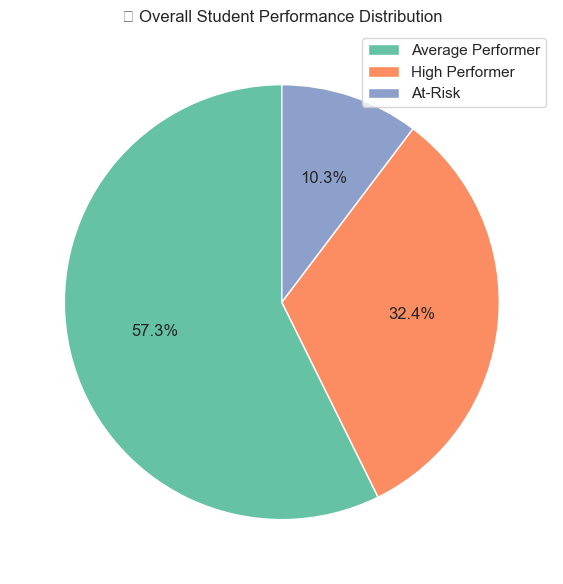

In [13]:
plt.figure(figsize=(6, 6))
df['performance category'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"), labels=None)
plt.title("🎯 Overall Student Performance Distribution")
plt.legend(labels=df['performance category'].value_counts().index, loc="best")
plt.ylabel("")
plt.tight_layout()
plt.show()

📌 D. Business/Institutional Insight Suggestions (in markdown):

## 💡 Final Insights & Recommendations

- 🎯 **Only 103 out of 1000 students (~10.3%) are at risk** based on average scores below 50.
- 🧠 Students who **completed the test preparation course** show a noticeably **higher average score**.
- 🍽️ Students with **standard lunch** tend to perform better than those with reduced lunch — suggesting potential socioeconomic impact.
- ⚥ Minor variation observed across gender; however, other factors like preparation and attendance matter more.

### ✅ Institutional Suggestions:
- Encourage more students to enroll in **test preparation programs**.
- Consider **academic support programs** (e.g., mentoring or tutoring) for students scoring below 50.
- Use this dashboard regularly to flag at-risk students **early in the semester** for intervention.

## 📌 Conclusion

In this project, we aimed to address a critical challenge in education: **early identification of students who are at risk of underperforming or dropping out**. Using student-level performance data — including marks in math, reading, and writing — along with test preparation status, lunch type, and gender, we built a data-driven dashboard to uncover meaningful patterns and guide interventions.

---

### ✅ Key Findings

1. **Performance Categorization**:
   - Students were categorized as **High Performers**, **Average**, or **At-Risk** based on their average scores.
   - This classification provided a clear breakdown of student groups and their academic standing.

2. **Impact of Test Preparation**:
   - Students who **completed a test preparation course** consistently scored higher across all subjects.
   - This suggests that structured prep programs are effective and should be encouraged.

3. **Lunch Type and Socioeconomic Indicator**:
   - Students with **standard lunch plans** performed better than those with **reduced lunches**.
   - This may reflect underlying **socioeconomic disparities** impacting educational outcomes.

4. **Gender-Based Insights**:
   - Gender showed minimal impact on average scores.
   - Performance gaps appear more influenced by preparation and support than by gender.

5. **At-Risk Students**:
   - A specific group of students scored **below 50** on average and were flagged as **at-risk**.
   - Most had not completed the prep course and were more likely to have reduced lunch plans.

---

### 📈 Business / Institutional Value

- The dashboard enables **real-time academic monitoring** and **early warning signals** for low-performing students.
- It empowers schools and colleges to **target interventions** such as tutoring, test prep access, and mentoring.
- By acting early, institutions can **improve pass rates, student retention, and overall academic performance**.

---

### 💡 Recommendations

- Make test preparation courses **more widely accessible**, especially for at-risk groups.
- Combine performance dashboards with **attendance and behavioral data** for even stronger early intervention signals.
- Reassess support systems for students with **financial hardships** (e.g., those on reduced lunch plans).
- Integrate this dashboard into **semester review processes** for continuous improvement.

---

### 🏁 Final Thought

This project highlights the power of simple analytics in solving real problems. With just a few key features, we were able to design a performance-monitoring tool that can create **transformational impact** in education by enabling **data-driven decision-making**.
